In [ ]:
import numpy as np
import pandas as pd
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb



In [37]:
dataset ='krantiswalke/bank-personal-loan-modelling'

kaggle.api.authenticate()
kaggle.api.dataset_download_files(dataset,  unzip=True)

Dataset URL: https://www.kaggle.com/datasets/krantiswalke/bank-personal-loan-modelling


In [38]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [40]:
df.isna().sum().sum()

np.int64(0)

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df=df.drop(columns=['ID','ZIP Code'])

In [43]:
len(df.columns)

12

In [44]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [45]:
df.nunique()

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

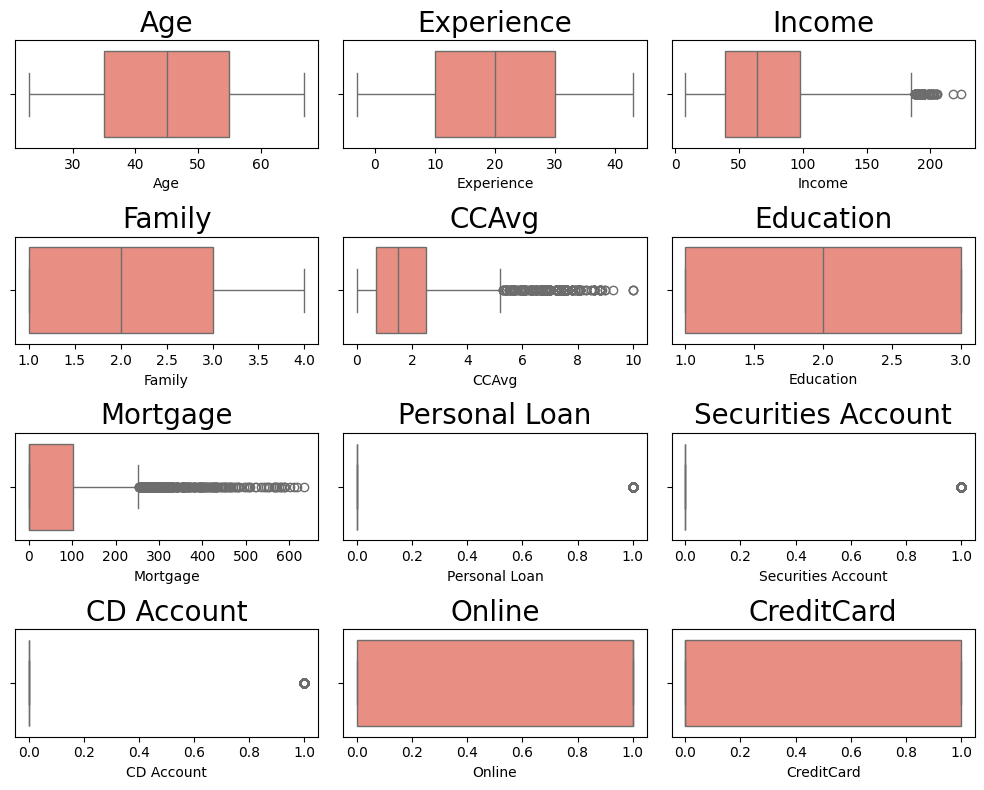

In [46]:
total = len(df.columns)
col = 3
row = int(np.ceil(total/col))
fig,axes = plt.subplots(nrows=row,ncols=col,figsize=(10,2*row))
axes = axes.flatten()
for i , col in enumerate(df.columns):
    sns.boxplot(df[col],ax= axes[i],color='salmon',orient='h')
    axes[i].set_title(col,fontsize=20)

for j in range(i+1,len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [47]:
skewed_cols = []
for col in df.columns:
    if abs(df[col].skew()) >1:
        skewed_cols.append(col)
    
print(skewed_cols)

['CCAvg', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account']


In [48]:
skewed_cols = [i for i in skewed_cols if df[i].nunique()>2]
print(skewed_cols)

['CCAvg', 'Mortgage']


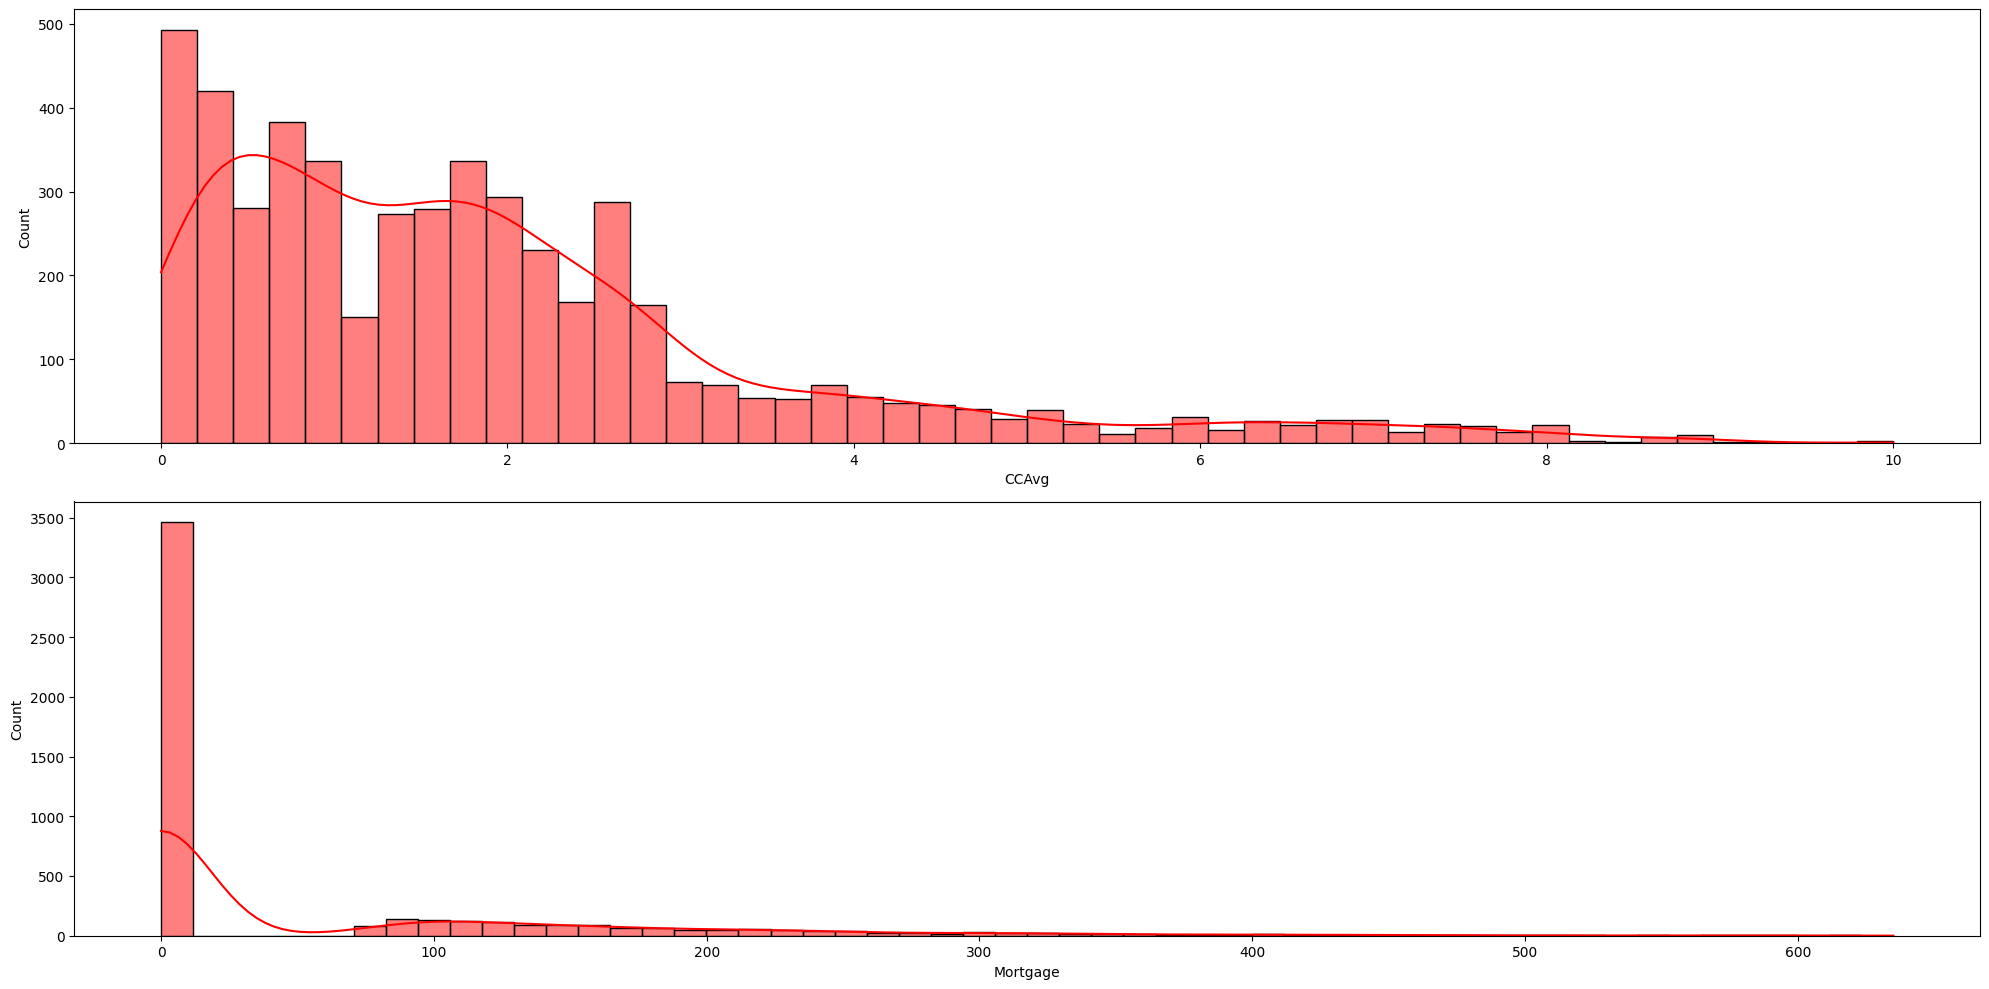

In [49]:
total = len(skewed_cols)
col = 1
rows = int(np.ceil(total/col))
fig, axes = plt.subplots(rows,col,figsize=(20,5*rows))
axes = axes.flatten()
for i,col in enumerate(skewed_cols):
    sns.histplot(df[col],ax=axes[i],kde=1,color='red')

for j in range(i+1,len(axes)):
    axes[j].axis('off')
    

plt.tight_layout()
plt.show()

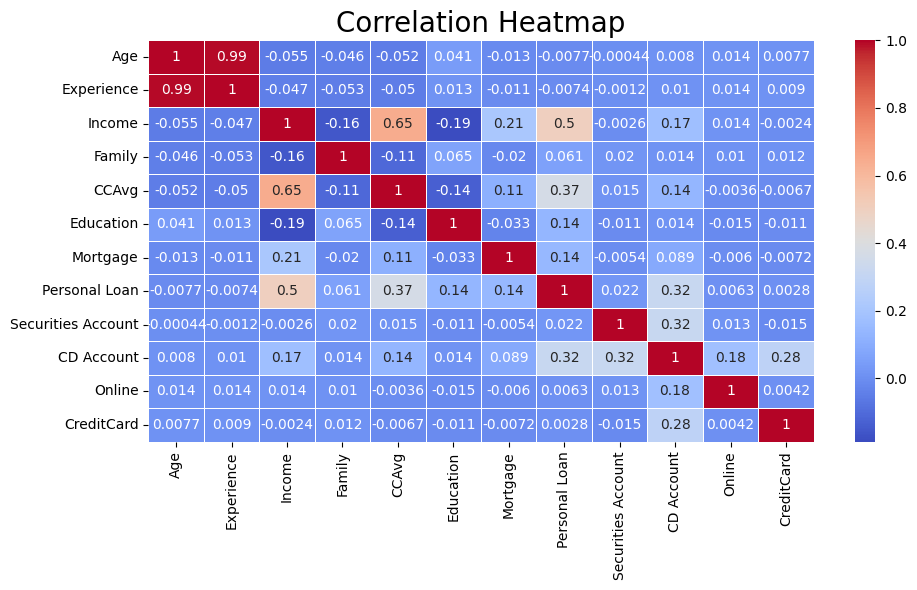

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

In [51]:
# Model 

In [52]:
x = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,random_state=1)

In [54]:
#Standard Scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [56]:
y_pred = model.predict(x_test_scaled)
y_prob = model.predict_proba(x_test_scaled)

Accuracy: 0.992
Precision: 1.0
Recall: 0.9090909090909091
F1 Score: 0.9523809523809523


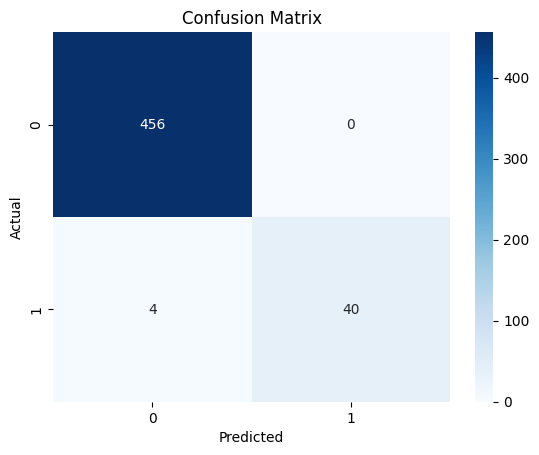


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       456
           1       1.00      0.91      0.95        44

    accuracy                           0.99       500
   macro avg       1.00      0.95      0.97       500
weighted avg       0.99      0.99      0.99       500



In [67]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#print("ROC AUC:", roc_auc_score(y_test, y_prob[:,1]))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


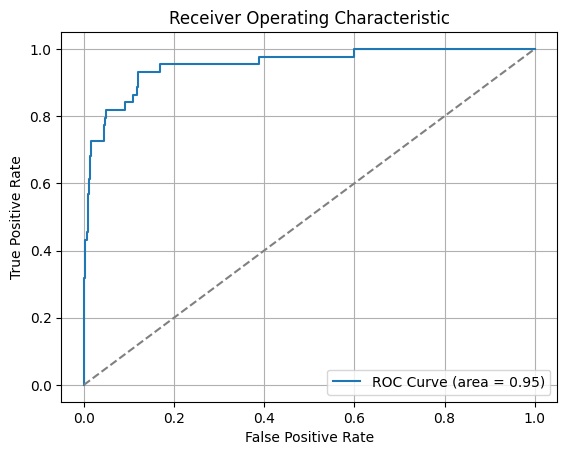

In [59]:

fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid()
plt.show()

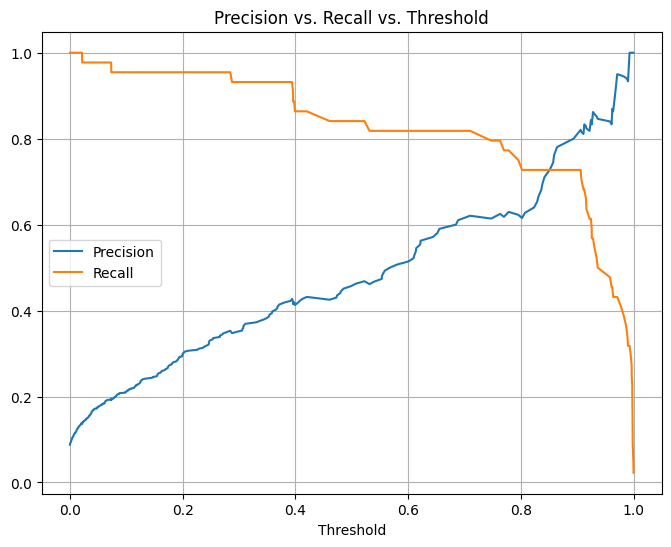

In [60]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

probs = model.predict_proba(x_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision vs. Recall vs. Threshold')
plt.legend()
plt.grid()
plt.show()


In [61]:
from sklearn.metrics import f1_score
import numpy as np

# Calculate F1 for all thresholds
f1_scores = [f1_score(y_test, (probs >= t).astype(int)) for t in thresholds]

# Best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"🔍 Best Threshold = {best_threshold:.2f} with F1 Score = {best_f1:.4f}")


🔍 Best Threshold = 0.91 with F1 Score = 0.7711


In [62]:
y_pred_opt = (probs >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_opt))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       456
           1       0.82      0.73      0.77        44

    accuracy                           0.96       500
   macro avg       0.90      0.86      0.88       500
weighted avg       0.96      0.96      0.96       500



In [63]:


# You can keep your train-test split and scaling if already done
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # optional but helps with imbalance
)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       0.95      0.82      0.88        44

    accuracy                           0.98       500
   macro avg       0.97      0.91      0.93       500
weighted avg       0.98      0.98      0.98       500

ROC AUC: 0.9967603668261562


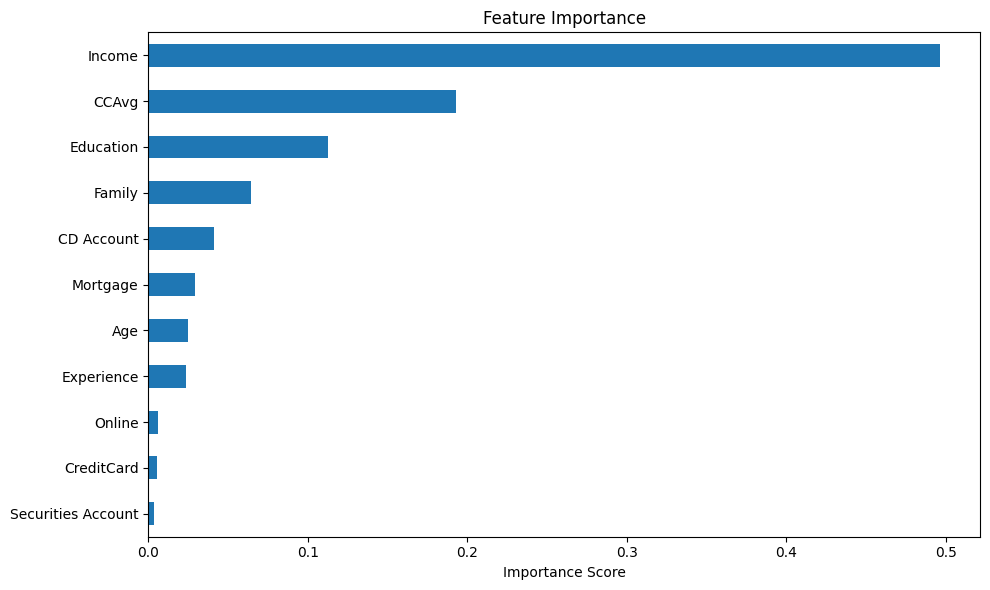

In [64]:

feat_imp = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

Accuracy: 0.992
ROC AUC: 0.9979565390749602
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       456
           1       1.00      0.91      0.95        44

    accuracy                           0.99       500
   macro avg       1.00      0.95      0.97       500
weighted avg       0.99      0.99      0.99       500



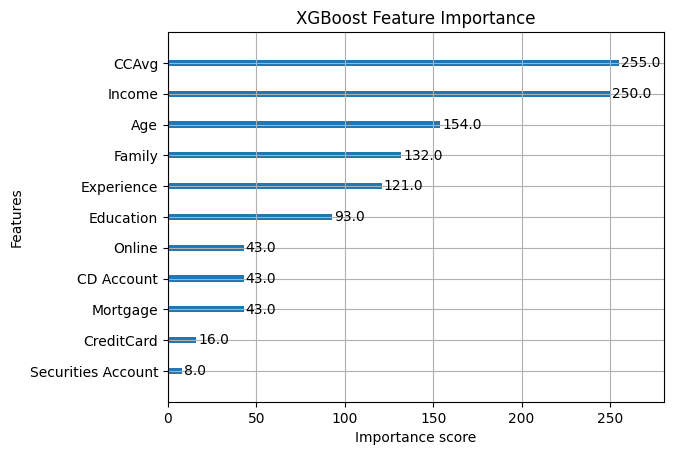

In [66]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()
